# Expression of Crow data

This notebook tests the hypothesis that the uncorrelated genes from

This data was generated by running `download_Crow_data.R` script that downloads expression data from https://github.com/PavlidisLab/gemmaAPI.R

In [1]:
%load_ext autoreload
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ponyo import utils
from generic_expression_patterns_modules import ranking

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_human_general.tsv")
)

params = utils.read_config(config_filename)
local_dir = params["local_dir"]
dataset_name = params["dataset_name"]
project_id = params["project_id"]
col_to_rank_genes = params["rank_genes_by"]
mapped_compendium_filename = params["mapped_compendium_filename"]

## Format data

* Drop extra rows so that the data frame only includes gene samples x gene symbol
* Include only genes that were used in our original analysis

In [21]:
# Read in combined expression data
crow_expression_filename = os.path.join(local_dir, "Crow_expression_data.tsv")
crow_expression_data = pd.read_csv(
    crow_expression_filename, sep="\t", index_col=0, header=0
)

In [24]:
crow_expression_data.shape

(5549, 54675)

In [23]:
crow_expression_data.head(20)

,1,2,3,4,5,6,7,8,9,10,...,54666,54667,54668,54669,54670,54671,54672,54673,54674,54675
1,1007_s_at,1053_at,117_at,121_at,1294_at,1316_at,1431_at,1438_at,1487_at,1494_f_at,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1007_s_at_collapsed,1053_at_collapsed,117_at_collapsed,121_at_collapsed,1294_at_collapsed,1316_at_collapsed,1431_at_collapsed,1438_at_collapsed,1487_at_collapsed,1494_f_at_collapsed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DDR1,RFC2,HSPA6|HSPA7,PAX8,UBA7,THRA,CYP2E1,EPHB3,ESRRA,CYP2A7|CYP2A6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,discoidin domain receptor tyrosine kinase 1,replication factor C subunit 2,heat shock protein family A (Hsp70) member 6|h...,paired box 8,ubiquitin like modifier activating enzyme 7,thyroid hormone receptor alpha,cytochrome P450 family 2 subfamily E member 1,EPH receptor B3,estrogen related receptor alpha,cytochrome P450 family 2 subfamily A member 7|...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16908,139878,73420|73442,173107,165857,160776,33104,43254,44096,32838|32813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,780,5982,3310|3311,7849,7318,7067,1571,2049,2101,1549|1548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,902.20520,24.42166,8.96564,43.28744,83.32761,16.33052,12.57626,2.52201,48.94783,6.05333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,836.49841,18.59961,769.30450,64.41640,61.90878,27.72837,17.53331,3.39986,119.33116,17.42643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1346.03589,69.34320,23.69639,128.69017,93.37774,24.45201,26.12007,20.09421,80.67838,27.73698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1470.85925,43.08162,10.37628,77.08700,56.58948,27.17969,11.94389,NaN,64.83450,14.86978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# TO DO
# Drop extra rows

In [5]:
# Load gene_summary_filename
gene_summary_filename = os.path.join(
    base_dir, dataset_name, f"generic_gene_summary_{project_id}.tsv"
)

summary_gene_ranks = pd.read_csv(gene_summary_filename, sep="\t", index_col=0, header=0)

In [6]:
# TO DO
# Subset genes
"""our_gene_ids = list(summary_gene_ranks.index())
crow_gene_ids = list(crow_expression_data.columns)

shared_gene_ids = set(crow_gene_ids).intersection(our_gene_ids)

expression_data = crow_expression_data.loc[shared_gene_ids]"""

'our_gene_ids = list(summary_gene_ranks.index())\ncrow_gene_ids = list(crow_expression_data.columns)\n\nshared_gene_ids = set(crow_gene_ids).intersection(our_gene_ids)\n\nexpression_data = crow_expression_data.loc[shared_gene_ids]'

## Get uncorrelated genes

r = 0.1851597404594152
p = 3.711325673092676e-132
ci_low = 0.1711953549673471
ci_high = 0.1996095604798557


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


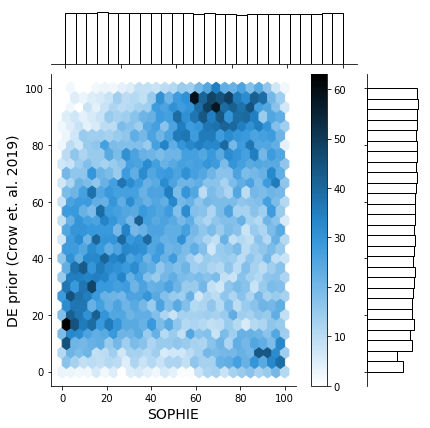

In [7]:
# Get generic genes identified by Crow et. al.
DE_prior_filename = params["reference_gene_filename"]
ref_gene_col = params["reference_gene_name_col"]
ref_rank_col = params["reference_rank_col"]

figure_filename = f"gene_ranking_{col_to_rank_genes}_tmp.svg"

corr, shared_ranking = ranking.compare_gene_ranking(
    summary_gene_ranks,
    DE_prior_filename,
    ref_gene_col,
    ref_rank_col,
    figure_filename,
)

In [8]:
shared_ranking.head()

,Percentile (simulated),DE_Prior_Rank,Gene_Name
Gene_Order,,,
17183,16.649769,10.381345,USP22
9751,30.477639,49.136627,SNX5
10215,97.223161,46.718660,CRYAA
6383,45.279937,66.706662,S100A13
17791,97.758252,7.493870,SLC6A5


In [9]:
# Get uncorrelated gene ids
uncorrelated_ranking = shared_ranking[
    (shared_ranking["Percentile (simulated)"] > 80)
    & (shared_ranking["DE_Prior_Rank"] < 20)
]

uncorrelated_genes = uncorrelated_ranking["Gene_Name"]
print(len(uncorrelated_genes))

791


## Get average expression data

In [10]:
# Get average expression of SOPHIE trained recount2 dataset
recount2_expression = pd.read_csv(
    mapped_compendium_filename, sep="\t", index_col=0, header=0
)

recount2_expression_mean = recount2_expression.mean()

In [11]:
# Get average expression of Crow dataset
# crow_expression_mean = crow_expression_data.mean()

In [12]:
# TO DO
# Normalize or scale data?
# Coloring

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 95.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Average recount2 expression with uncorrelated genes highlighted')

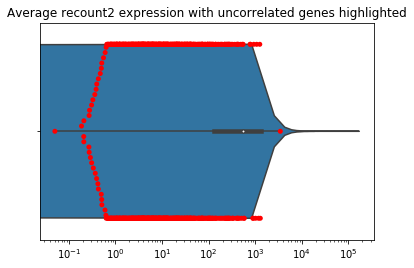

In [17]:
# Violin plot of average recount2 expression highlighing uncorrelated genes
f = sns.violinplot(recount2_expression_mean)
f = sns.swarmplot(recount2_expression_mean.loc[uncorrelated_genes], color="red")
plt.xscale("log")
f.set_title("Average recount2 expression with uncorrelated genes highlighted")

In [ ]:
# Violin plot of average array expression highlighing uncorrelated genes
"""g = sns.violinplot(crow_expression_mean)
g = sns.stripplot(crow_expression_mean.loc[uncorrelated_genes], color="red")
plt.xscale("log")
g.set_title("Average array expression with uncorrelated genes highlighted")"""

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


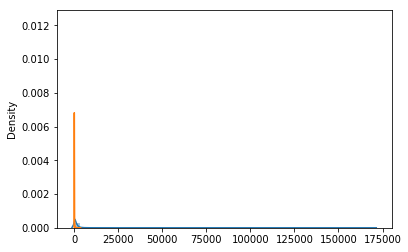

In [14]:
# Distribution plot with distribution of Crow vs uncorrelated genes
sns.distplot(recount2_expression_mean)
sns.distplot(recount2_expression_mean.loc[uncorrelated_genes])